In [234]:
# 1、读取监督分类的遥感影像,可以认为是一个掩膜数据。
# 2、读取NDVI、NDGI、RVI植被指数指标影像，存储为中间变量。
# 3、根据样本的植被指数指标设定过滤指标，第一次筛选：K(NDGI[8-22])<0,生成掩膜数据一
# 4、根据样本的植被指数指标设定过滤指标，第二次筛选：K(NDGI[8-22至9-16])>0,生成掩膜数据二
# 5、根据样本的植被指数指标设定过滤指标，第三次筛选：RVI[08-02至09-16]在(0.07,0.17)以外,生成掩膜数据三
# 6、把三次掩膜数据进行叠加，有0的标记为0，其他的标记为1，生成新的掩膜数据总
# 7、掩膜数据总和之前最大似然法获取的作物分类影像行进运算，提升影像运算精度，导出最终分类影像。

# 1、读取监督分类的遥感影像,可以认为是一个掩膜数据。

In [1]:
from osgeo import gdal
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# tif_class = r'E:\Desktop\Summary\种植结构提取-水稻\datas\MLSC\MLSC_2021-08-22_4074_S2DL.tif'
tif_class = r'E:\Desktop\Summary\种植结构提取-水稻\datas\MLSC\MLSC0517_2021-08-22_4074_S2DL.tif'
dataset = gdal.Open(tif_class)
bandclass = dataset.GetRasterBand(1)
dataclass = bandclass.ReadAsArray()
dataclass.astype('int16')  # 设置分类后的数据类型
width = dataset.RasterXSize
height = dataset.RasterYSize
projection = dataset.GetProjection()
geotransform = dataset.GetGeoTransform()
print('完成！！！')

完成！！！


In [64]:
classic = dataclass.reshape(-1)

# 2、读取NDVI、NDGI、RVI植被指数指标影像，存储为中间变量。

In [4]:
# 2、读取NDVI、NDGI、RVI植被指数指标影像，存储为中间变量。
#NDVI 读取栅格数据
dfndvi = pd.DataFrame()
ProFiles = os.listdir(r'E:\Desktop\Summary\种植结构提取-水稻\datas\NDVI')
for item in tqdm(ProFiles):
    if item.lower().endswith('.tif'):
        src = (r'E:\Desktop\Summary\种植结构提取-水稻\datas\NDVI\\{}'.format(item))
        dataset = gdal.Open(src)
        ndvi_data = dataset.GetRasterBand(1).ReadAsArray()
        ndvi_data = np.nan_to_num(ndvi_data, nan=999)
        dfndvi[item[9:14]] = (ndvi_data.reshape(-1))
dfndvit = dfndvi.T
dfndvit['x'] = range(6)
# dfndvit.plot(x='x', y=list(range(1, 12)))
# dfndvit.to_csv(r'E:\Desktop\Summary\种植结构提取-水稻\datas\NDVI\ndvi.csv')

100%|██████████| 13/13 [00:00<00:00, 723.98it/s]


In [5]:
dfndgi = pd.DataFrame()
ProFiles = os.listdir(r'E:\Desktop\Summary\种植结构提取-水稻\datas\NDGI')
for item in tqdm(ProFiles):
    if item[-4:] == '.tif':
        src = (r'E:\Desktop\Summary\种植结构提取-水稻\datas\NDGI\\{}'.format(item))
        dataset = gdal.Open(src)
        ndgi_data = dataset.GetRasterBand(1).ReadAsArray()
        ndgi_data = np.nan_to_num(ndgi_data, nan=999)
        dfndgi[item[9:14]] = (ndgi_data.reshape(-1))
dfndgit = dfndgi.T
dfndgit['x'] = range(6)
# dfndgit.plot(x='x', y=list(range(1, 12)))
# dfndgit.to_csv(r'E:\Desktop\Summary\种植结构提取-水稻\datas\NDGI\ndgi.csv')

100%|██████████| 7/7 [00:00<00:00, 369.42it/s]


In [6]:
dfrvi = pd.DataFrame()
ProFiles = os.listdir(r'E:\Desktop\Summary\种植结构提取-水稻\datas\RVI')
for item in tqdm(ProFiles):
    if item[-4:] == '.tif':
        src = (r'E:\Desktop\Summary\种植结构提取-水稻\datas\RVI\\{}'.format(item))
        dataset = gdal.Open(src)
        rvi_data = dataset.GetRasterBand(1).ReadAsArray()
        rvi_data = np.nan_to_num(rvi_data, nan=999)
        dfrvi[item[8:13]] = (rvi_data.reshape(-1))
dfrvit = dfrvi.T
dfrvit['x'] = range(6)
# dfrvit.plot(x='x', y=list(range(1, 12)))
# dfrvit.to_csv(r'E:\Desktop\Summary\种植结构提取-水稻\datas\RVI\rvi.csv')

100%|██████████| 13/13 [00:00<00:00, 685.86it/s]


In [7]:
dfrvit

,0,1,2,3,4,5,6,7,8,9,...,203826,203827,203828,203829,203830,203831,203832,203833,203834,x
07-03,999.0,0.708869,0.672230,0.666888,0.669577,0.678208,0.690652,0.690652,0.694242,0.708651,...,0.682944,0.689519,0.688557,0.660290,0.660290,0.570157,0.489753,0.420241,999.0,0
08-02,999.0,0.096945,0.162025,0.149761,0.167720,0.170813,0.189131,0.189131,0.135271,0.115567,...,0.170451,0.234244,0.233996,0.127119,0.127119,0.082522,0.071731,0.078804,999.0,1
08-22,999.0,0.041948,0.058155,0.046536,0.052191,0.058699,0.095940,0.095940,0.104308,0.061321,...,0.076092,0.099560,0.075305,0.046975,0.046975,0.045636,0.040021,0.045964,999.0,2
09-16,999.0,0.110092,0.078486,0.076406,0.075494,0.096018,0.153597,0.153597,0.133333,0.116861,...,0.108523,0.084171,0.071934,0.063236,0.063236,0.062044,0.061353,0.066432,999.0,3
10-06,999.0,0.521097,0.349306,0.311470,0.333537,0.350955,0.478384,0.478384,0.641994,0.660767,...,0.358219,0.148340,0.173434,0.303219,0.303219,0.434677,0.400683,0.230296,999.0,4
10-21,999.0,0.664099,0.632379,0.634213,0.621841,0.617352,0.597816,0.597816,0.638693,0.623410,...,0.339679,0.192552,0.231513,0.287465,0.287465,0.363985,0.342499,0.253822,999.0,5


# 3、根据样本的植被指数指标设定过滤指标，第一次筛选：NDVI['10-06']凹凸性判断是否是水稻或者玉米

In [11]:
# 获取NDGI的斜率
# 根据条件一筛选
# dfndgit.shape
x_data = dfndvit['x'].values
NDGI_data = []
for i in range(dfndvit.shape[1] - 1):
    tmp = dfndvit[i].values
    NDGI_data.append(tmp)

In [14]:
ndvi = pd.DataFrame(NDGI_data)
ndvi

,0,1,2,3,4,5
0,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
1,0.170364,0.823245,0.919482,0.801653,0.314840,0.201851
2,0.196008,0.721134,0.890082,0.854452,0.482243,0.225205
3,0.199840,0.739491,0.911066,0.858035,0.525006,0.223831
4,0.197908,0.712740,0.900795,0.859611,0.499771,0.233166
...,...,...,...,...,...,...
203830,0.204609,0.774436,0.910266,0.881050,0.534661,0.553441
203831,0.273758,0.847538,0.912711,0.883161,0.394042,0.466292
203832,0.342505,0.866140,0.923037,0.884386,0.427874,0.489759
203833,0.408211,0.853904,0.912112,0.875413,0.625624,0.595123


In [39]:
mask1 = np.where(((ndvi[3] + ndvi[5]) > 2 * ndvi[4]), 3, 0)
mask1  #玉米
mask2 = np.where(((ndvi[3] + ndvi[5]) < 2 * ndvi[4]), 2, 0)
mask2  #水稻
mask_union = mask1 + mask2

In [40]:
mask_union

array([0, 3, 3, ..., 3, 3, 0])

# 4、根据样本的植被指数指标设定过滤指标，第一次筛选：K(NDGI[8-22])<0,生成掩膜数据一

In [56]:
x_data = dfndgit['x'].values
NDGI_data = []
for i in range(dfndgit.shape[1] - 1):
    tmp = dfndgit[i].values
    NDGI_data.append(tmp)
slope_ndgi = []
for item in NDGI_data:
    tmp1 = np.gradient(item, x_data)
    slope_ndgi.append(tmp1)
s_ndgi = pd.DataFrame(slope_ndgi)
mask1 = np.where(((s_ndgi[2] >=0)&(s_ndgi[3] <=0)|(s_ndgi[3] >=0)&(s_ndgi[4] <=0)), 1, 0)
mask1

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
mask1

# 7、掩膜数据总和之前最大似然法获取的作物分类影像行进运算，提升影像运算精度，导出最终分类影像。

In [65]:
classic

array([1., 0., 0., ..., 0., 0., 1.], dtype=float32)

In [66]:
mask_corn = np.where(((classic == 0) & (mask_union == 3)), 3, 0)
mask_corn

array([0, 3, 3, ..., 3, 3, 0])

In [67]:
mask_rice = np.where(((classic == 0) & (mask_union == 2)), 2, 0)
mask_rice
# mask

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
result_mask=mask_corn+mask_rice
# result_mask=np.where(mask1==1,result_mask,0)

In [58]:
# result_mask

array([0, 0, 3, ..., 0, 0, 0])

In [69]:
mask = result_mask

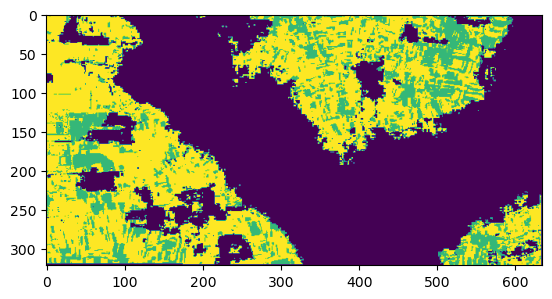

In [70]:
band = mask.reshape((height, width))
plt.imshow(band)
plt.savefig(r'E:\Desktop\Summary\种植结构提取-水稻\datas\LineChart\result5.png', dpi=600)

In [61]:
tif_class = r'E:\Desktop\Summary\种植结构提取-水稻\datas\MLSC\MLSC_2021-08-22_4074_S2DL.tif'
dataset = gdal.Open(tif_class)
bandclass = dataset.GetRasterBand(1)
dataclass = bandclass.ReadAsArray()
dataclass.astype('int16')  # 设置分类后的数据类型
width = dataset.RasterXSize
height = dataset.RasterYSize
projection = dataset.GetProjection()
geotransform = dataset.GetGeoTransform()
print('完成！！！')

完成！！！


In [25]:
classic.sum()

111938.0

In [71]:
result_path = r'E:\Desktop\Summary\种植结构提取-水稻\datas\result05170910sampel1.tif'
target_ds = gdal.GetDriverByName('GTiff').Create(result_path, xsize=width, ysize=height, bands=1,
                                                 eType=gdal.GDT_Int16)
target_ds.SetGeoTransform(dataset.GetGeoTransform())
target_ds.SetProjection(dataset.GetProjection())
del dataset
target_ds.GetRasterBand(1).SetNoDataValue(9999)
target_ds.GetRasterBand(1).WriteArray(band)
target_ds.FlushCache()